In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [12]:
names = ['control',
        #'0.01 weight ZG',
        #'0 weight ZG',
        '0.1 weight ZG',
        '0.5 K-L and 0.5 rec',
        #'4 layers',
        #'0.01 K-L and 0.99 rec',
        #'2 skip',
        #'no dropout/btchnorm',
        'decoder without mask',
        'no filters',
        'Z8',
        'Z8/0.1 weight ZG',
        #'Z2',
        #'Z2/0.1 weight ZG',
        'Z8/ 800 yrs/ control',
        'Z8/800 yrs/0.1 weight ZG',
        ]
folders = [ './models/filterFrance/Z64/yrs100/control/', # k.9.1fw2.1.2.lrs8/',
            #'./models/filterFrance/Z64/yrs100/fw2..01.2/',   # k.9.1fw2..01.2.lrs8/',
            #'./models/filterFrance/Z64/yrs100/fw2.0.2/',
            './models/filterFrance/Z64/yrs100/fw2..1.2/', # k.9.1fw2..1.2.lrs8/',
            './models/filterFrance/Z64/yrs100/k.5.5/', #k.5.5fw2.1.2.lrs8/',
            #'./models/filterFrance/Z64/yrs100/lrs4/', #k.9.1fw2.1.2/',
            #'./models/filterFrance/Z64/yrs100/k.99.01/', #k.99.01fw2.1.2.lrs8_fix/',
            #'./models/filterFrance/Z64/yrs100/skip2/', # k.9.1fw2.1.2.lrs8skip2/',
            #'./models/filterFrance/Z64/yrs100/nodrpbnrml/', #k.9.1fw2.1.2.lrs8nodrpbnrml/',
            './models/filterFrance/Z64/yrs100/nomask/',
            './models/nofilter/Z64/yrs100/nomask/',
            './models/filterFrance/Z8/yrs100/control/',
            './models/filterFrance/Z8/yrs100/fw2..1.2/',
            #'./models/filterFrance/Z2/yrs100/control/',
            #'./models/filterFrance/Z2/yrs100/fw2..1.2/',
            './models/filterFrance/Z8/yrs800/control/',
            './models/filterFrance/Z8/yrs800/fw20.1.20/'
            ]

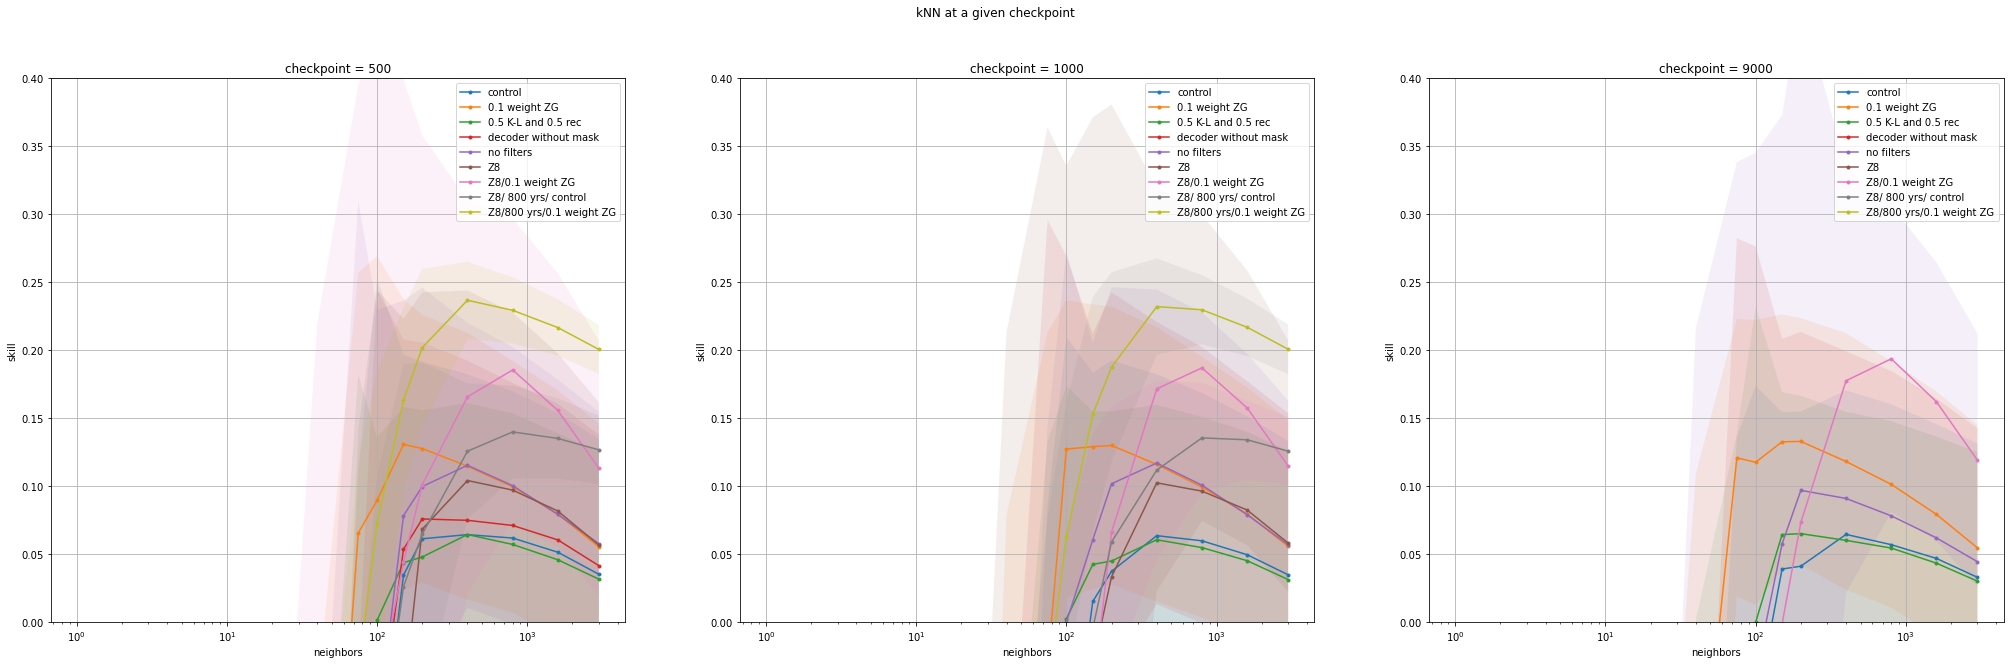

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [13]:
fig = plt.figure()
fig.set_size_inches(35, 10)
fig.suptitle('kNN at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([500,1000,9000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in zip(names, folders):
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2))
            maxiter=100
            ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),'kNN_uni'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('neighbors')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best')
    ax1.grid(True)

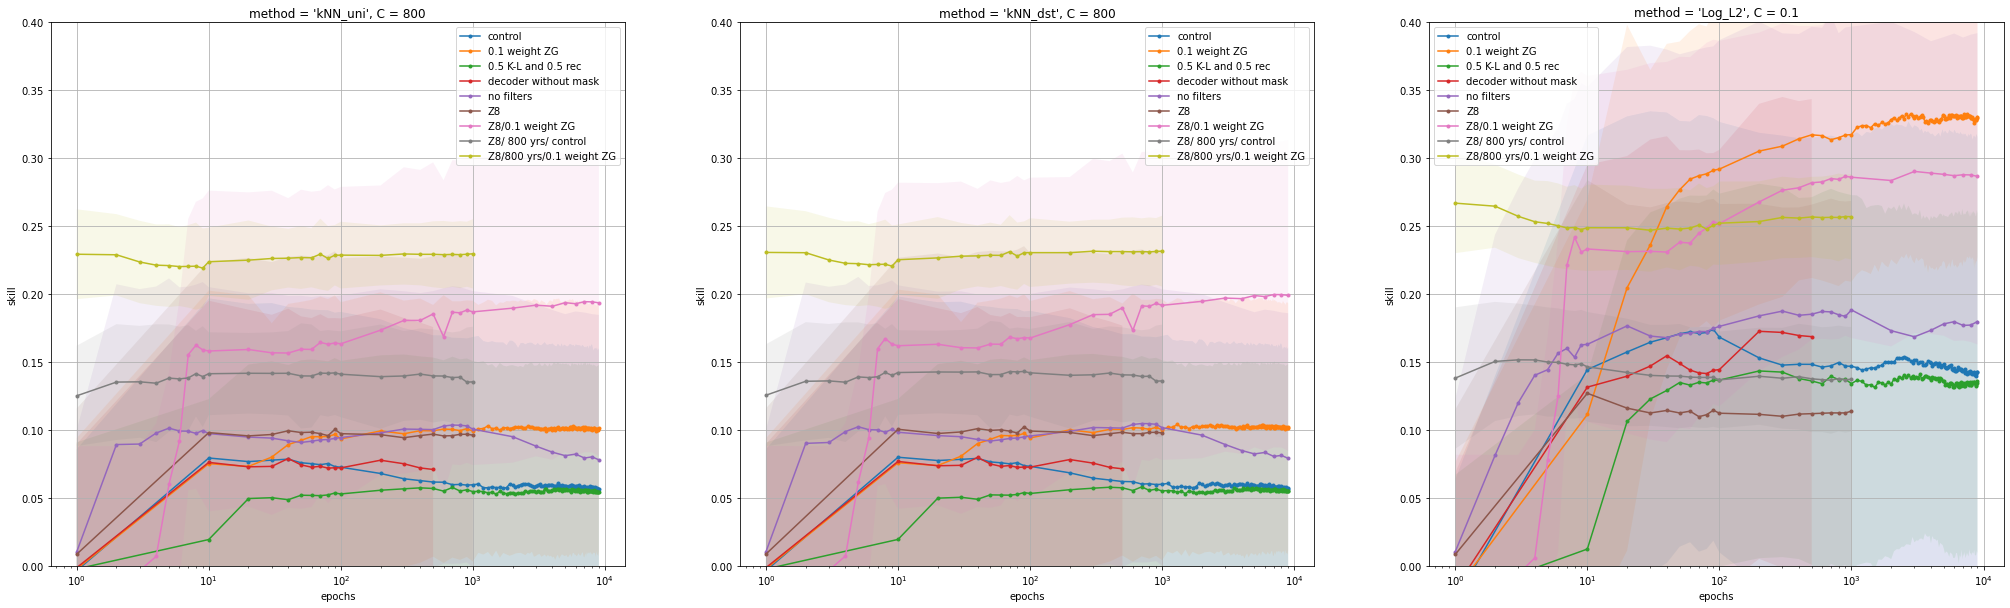

In [14]:
fig = plt.figure()
fig.set_size_inches(35, 10)
fig.suptitle('')

axs = fig.subplots(nrows=1, ncols=3)

for i, (C, method) in enumerate(zip([800,800,0.1],['kNN_uni','kNN_dst','Log_L2'])):
    ax1 = axs[i]
    for name, folder in zip(names, folders):
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2)) # The last command gets rid of C and method in the output
        stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(slice(None), C, method), 'skill'].droplevel(level=(1,2))
        maxiter=100
        ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
        ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{method = }, {C = }")
    ax1.legend(loc='best')
    ax1.grid(True)

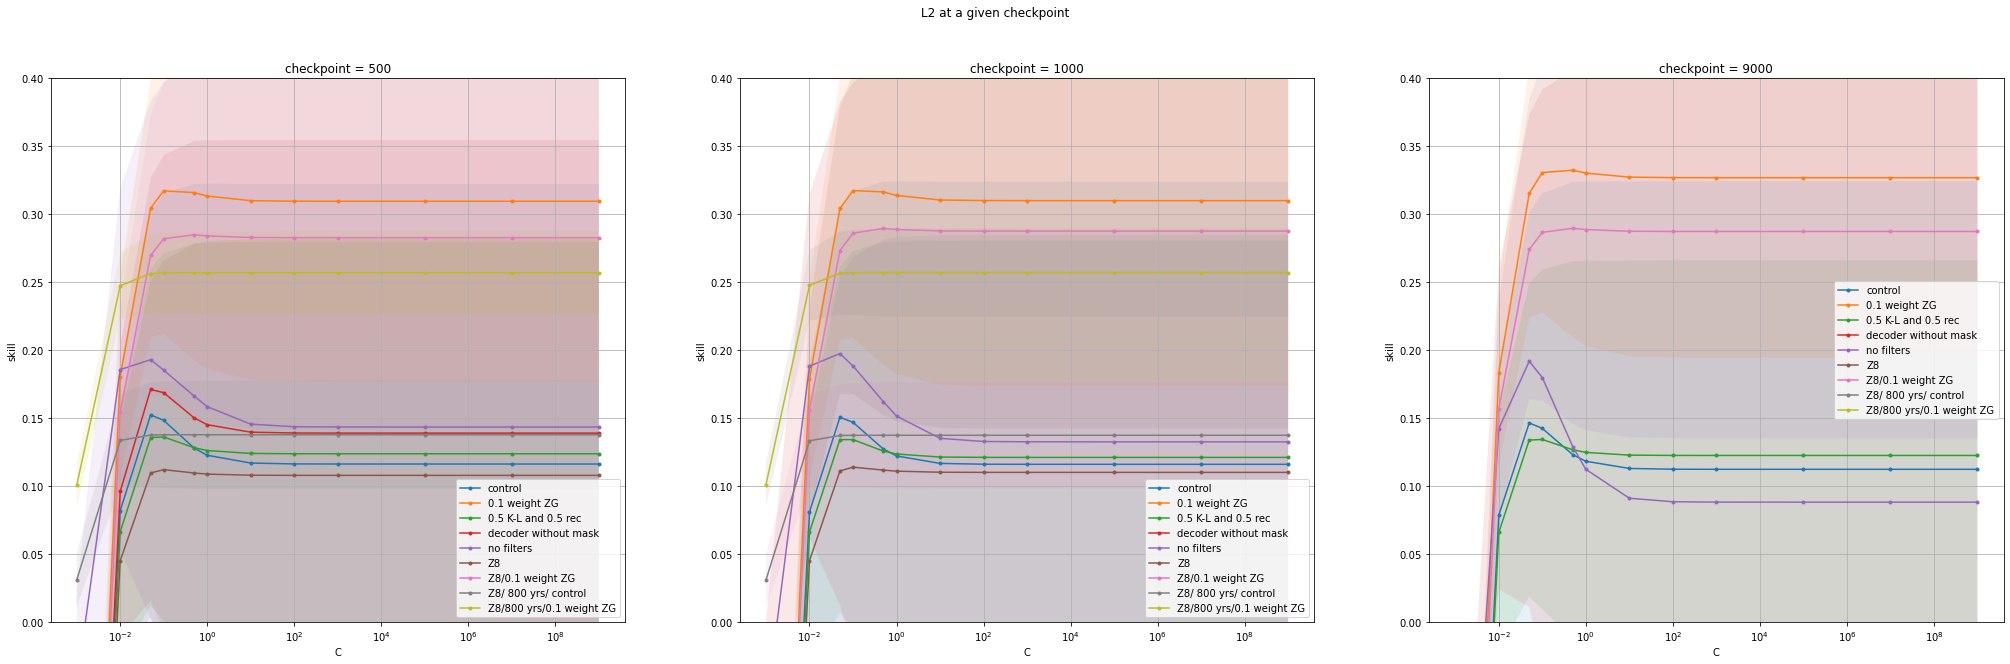

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [15]:
fig = plt.figure()
fig.set_size_inches(35, 10)
fig.suptitle('L2 at a given checkpoint')

axs = fig.subplots(nrows=1, ncols=3)

for i, checkpoint in enumerate([500,1000,9000]):
    ax1 = axs[i]
    plt.figure(figsize=(8,5))
    for name, folder in zip(names, folders):
        #print(name)
        score = pd.read_csv(f'{folder}score.csv') 
        if checkpoint in score.checkpoint.values:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            stdskillvsckpt = score.groupby(['checkpoint', 'C','method']).std().loc[(checkpoint, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2))
            maxiter=100
            ax1.fill_between(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter]-stdskillvsckpt.values[:maxiter],meanskillvsckpt.values[:maxiter]+stdskillvsckpt.values[:maxiter],alpha=0.1)
            ax1.plot(meanskillvsckpt.index[:maxiter],meanskillvsckpt.values[:maxiter],label=name, marker='.')
        else:
            meanskillvsckpt = score.groupby(['checkpoint', 'C','method']).mean().loc[(10, slice(None),'Log_L2'), 'skill'].droplevel(level=(0,2)) # The last command gets rid of C and method in the output
            ax1.plot(meanskillvsckpt.index[:maxiter],np.inf*meanskillvsckpt.values[:maxiter],label=name, marker='.')
    ax1.set_xlabel('C')
    ax1.set_ylabel('skill')
    ax1.set_ylim([0,0.4])
    ax1.set_xscale("log")
    ax1.set_title(f"{checkpoint = }")
    ax1.legend(loc='best')
    ax1.grid(True)